向正中  2020.9.25  |
参考:
<a href='https://blog.csdn.net/Cowry5/article/details/80174130'>参考链接</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataSetPath = 'ex1data1.txt'
# read the txt
# names添加列名，header用指定的行来作为标题，若原无标题且指定标题则设为None
data = pd.read_csv(dataSetPath,header=None,names=['Population','Profit'])
# show data
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


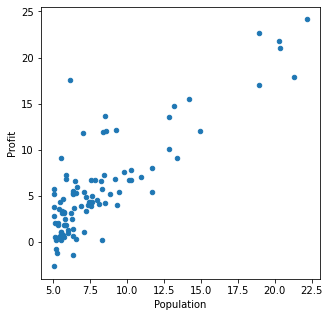

In [4]:
# show the data with a picture
data.plot(kind='scatter',x='Population',y='Profit',figsize=(5,5))
plt.show()

In [5]:
# 进行归一化
# data = (data - data.mean()) / data.std()
# data.head()
# data.describe()

In [6]:
# show
# data.plot(kind='scatter',x='Population',y='Profit',figsize=(5,5))
# plt.show()

代价函数$J_\theta$:

In [7]:
def costFunction(X,y,theta):
    inner = np.power(X*theta.T-y,2)
    return np.sum(inner)/(2*len(X))

In [8]:
# 即：在第0列插入列名为Ones的值为1的一列,方便下面操作
data.insert(0,'Ones',1)


进行数据预处理

In [9]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [10]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix([0,0])

In [11]:
X.shape,y.shape,theta.shape

((97, 2), (97, 1), (1, 2))

In [12]:
# 初始代价函数的值
costFunction(X,y,theta)

32.072733877455676

批量梯度下降

In [13]:
def gradientDescent(X,y,theta,alpha,epoch):
    temp = np.matrix(np.zeros(theta.shape)) # 初始化一个向量 1*2
    parameters = int(theta.flatten().shape[1]) # 参数theta的数量
    cost = np.zeros(epoch) # 初始化一个ndarray，包含每次epoch的cost
    m = X.shape[0] # 样本的数量

    for i in range(epoch):
        temp = theta - (alpha/m) * (X*theta.T-y).T*X
        # 以下是不用Vectorization求解梯度下降
#         error = (X * theta.T) - y  # (97, 1)
        
#         for j in range(parameters):
#             term = np.multiply(error, X[:,j])  # (97, 1)
#             temp[0,j] = theta[0,j] - ((alpha / m) * np.sum(term))  # (1,1)
        theta = temp
        cost[i] = costFunction(X,y,theta)
    return theta,cost

In [14]:
alpha = 0.01
epoch = 1000

In [15]:
final_theta,cost = gradientDescent(X,y,theta,alpha,epoch)

In [16]:
final_theta

matrix([[-3.24140214,  1.1272942 ]])

In [17]:
costFunction(X,y,theta)

32.072733877455676

In [18]:
costFunction(X,y,final_theta)

4.515955503078912

绘制线性模型以及数据，查看其拟合情况
np.linspace()在指定的间隔内返回均匀间隔的数字

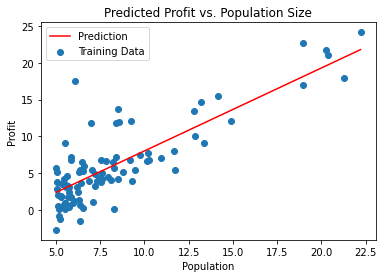

In [19]:
x = np.linspace(data.Population.min(),data.Population.max(),100) # row

f = final_theta[0,0] + final_theta[0,1]*x # col
# plt.subplots()返回一个包含figure和axes对象的元组
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data['Population'],data.Profit,label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，线性回归中的代价函数总是降低的 - 这是凸优化问题的一个例子。

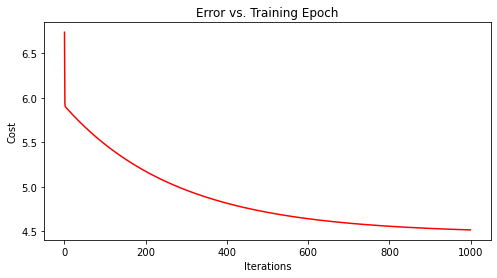

In [20]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(np.arange(epoch), cost, 'r')  # np.arange()返回等差数组
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()